In [1]:
#Importing all the libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

/home/pi/mausam/mausam-main/mausamm/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
weather_df=pd.read_csv(r"/home/pi/mausam/mausam-main/models/Final Datasets/nTemperature.csv")

In [3]:
print(weather_df.shape)
print(weather_df.describe())
print(weather_df.head())
print(weather_df.columns)

(100990, 9)
                Date          Month           Hour     heatindex  \
count  100990.000000  100990.000000  100990.000000  29155.000000   
mean       15.690049       6.579344      10.928844     35.651710   
std         8.769718       3.475841       6.854328      5.015384   
min         1.000000       1.000000       0.000000     26.800000   
25%         8.000000       4.000000       5.000000     31.700000   
50%        16.000000       7.000000      11.000000     35.100000   
75%        23.000000      10.000000      17.000000     39.200000   
max        31.000000      12.000000      23.000000     73.600000   

            humidity           rain           temp  temp previous  
count  100233.000000  100990.000000  100317.000000  100317.000000  
mean       57.909481       0.026260      25.451260      25.451269  
std        23.807771       0.159908       8.482854       8.482859  
min         4.000000       0.000000       1.000000       1.000000  
25%        39.000000       0.000000

In [4]:
#Preprocessing the data
print(weather_df.isnull().any())
weather_df["heatindex"].fillna(35.651710, inplace = True)
weather_df["humidity"].fillna(57.909481, inplace = True)
weather_df["temp"].fillna(25.451269, inplace = True)
weather_df["temp previous"].fillna(25.451489, inplace = True)
print(weather_df.isnull().any())
#All these mean values are obtained after describing the data set

Date             False
Month            False
Hour             False
Time             False
heatindex         True
humidity          True
rain             False
temp              True
temp previous     True
dtype: bool
Date             False
Month            False
Hour             False
Time             False
heatindex        False
humidity         False
rain             False
temp             False
temp previous    False
dtype: bool


In [5]:
print(weather_df.head())
print(weather_df.describe())

   Date  Month  Hour   Time  heatindex  humidity  rain  temp  temp previous
0     1     11    11  11:00   35.65171      27.0     0  28.0           30.0
1     1     11    12  12:00   35.65171      32.0     0  24.0           28.0
2     1     11    13  13:00   35.65171      44.0     0  24.0           24.0
3     1     11    14  14:00   35.65171      41.0     0  23.0           24.0
4     1     11    16  16:00   35.65171      47.0     0  21.0           23.0
                Date          Month           Hour      heatindex  \
count  100990.000000  100990.000000  100990.000000  100990.000000   
mean       15.690049       6.579344      10.928844      35.651710   
std         8.769718       3.475841       6.854328       2.694736   
min         1.000000       1.000000       0.000000      26.800000   
25%         8.000000       4.000000       5.000000      35.651710   
50%        16.000000       7.000000      11.000000      35.651710   
75%        23.000000      10.000000      17.000000      35.65

In [6]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]
weather_y=weather_df_num.pop('temp')
weather_x=weather_df_num

In [7]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)
train_x.head()

,Date,Month,Hour,heatindex,humidity,rain,temp previous
99686,6,1,15,35.65171,96.0,0,18.0
18305,29,1,10,35.65171,35.0,0,21.0
91877,20,8,6,35.65171,57.0,0,32.0
55714,29,2,14,35.65171,47.0,0,24.0
40664,2,2,7,35.65171,82.0,0,16.0


In [8]:
#First Model Linear Regression
tlrmodel = LinearRegression()
tlrmodel.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(test_x)
prediction=tlrmodel.predict(test_x)
#Calculating error
np.mean((prediction-test_y)**2)

       Date  Month  Hour  heatindex  humidity  rain  temp previous
16733    18     11     8   35.65171      21.0     0           28.0
82934    21      4    15   35.65171      27.0     0           30.0
33831    11      4    13   35.65171      13.0     0           35.0
22660    14     12    19   35.65171      77.0     0           14.0
47063    16      8    14   33.60000      89.0     0           28.0
...     ...    ...   ...        ...       ...   ...            ...
26343    24      5     8   44.40000      21.0     0           43.0
10264    12      9    22   35.65171      94.0     0           25.0
17753     4      1    15   35.65171      88.0     0           11.0
98956     2     12    12   35.65171      73.0     0           22.0
46164    26      7    23   34.50000      79.0     0           29.0

[20198 rows x 7 columns]


6.346134952426916

In [10]:
l=[29,6,14,48,45,0,33]
x=np.array(l).reshape(1,-1)
print(x.shape)
prediction=tlrmodel.predict(test_x)
print(prediction,tlrmodel.predict(x))

(1, 7)
[27.63285918 28.57850811 33.50069309 ... 11.39743133 22.1913649
 27.32664257] [31.56288319]


In [11]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':(test_y-prediction)})

,actual,prediction,diff
16733,28.0,27.632859,0.367141
82934,27.0,28.578508,-1.578508
33831,32.0,33.500693,-1.500693
22660,14.0,13.295137,0.704863
47063,28.0,28.118755,-0.118755
...,...,...,...
26343,43.0,41.957635,1.042365
10264,25.0,23.864677,1.135323
17753,10.0,11.397431,-1.397431
98956,19.0,22.191365,-3.191365


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(tlrmodel, 'TLinearRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#LR = joblib.load('TLinearRegression.pkl')  
  
# Use the loaded model to make predictions 
#LR.predict(X_test)

['TLinearRegression.pkl']

In [33]:
test_x

,Date,Month,Hour,heatindex,humidity,rain,temp previous
16733,18,11,8,35.65171,21.0,0,21.0
82934,21,4,15,35.65171,27.0,0,27.0
33831,11,4,13,35.65171,13.0,0,37.0
22660,14,12,19,35.65171,77.0,0,20.0
47063,16,8,14,33.60000,89.0,0,33.0
...,...,...,...,...,...,...,...
26343,24,5,8,44.40000,21.0,0,36.0
10264,12,9,22,35.65171,94.0,0,25.0
17753,4,1,15,35.65171,88.0,0,16.0
98956,2,12,12,35.65171,73.0,0,25.0


In [14]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly=PolynomialFeatures(degree=4)

In [16]:
x_poly=poly.fit_transform(train_x)

In [18]:
lin2=LinearRegression()

In [21]:
poly.fit(x_poly,train_y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-0bbf78d8781c>", line 1, in <module>
    poly.fit(x_poly,train_y)
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py", line 1470, in fit
    self.n_output_features_ = sum(1 for _ in combinations)
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py", line 1470, in <genexpr>
    self.n_output_features_ = sum(1 for _ in combinations)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mayank\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the ab

KeyboardInterrupt: 

In [ ]:
lin2.fit(x_poly,train_y)

In [ ]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
#Calculating the error
np.mean((prediction2-test_y)**2)

In [ ]:
pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

In [ ]:
#Saving the Polynomial Regression Model
joblib.dump(lin2, 'PRTP.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#PR = joblib.load('PRTP.pkl')  
  
# Use the loaded model to make predictions 
#PR.predict(X_test)

In [20]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [21]:
prediction3=regressor.predict(test_x)
print(np.mean((prediction3-test_y)**2))
dt=np.array([29,6,14,48,45,0,32]).reshape(1,-1)
print(regressor.predict(dt))

4.341853975505352
[39.]


In [22]:
pd.DataFrame({'actual':test_y,'prediction':prediction3,'diff':(test_y-prediction3)})

,actual,prediction,diff
16733,28.0,30.0,-2.0
82934,30.0,32.0,-2.0
33831,35.0,36.0,-1.0
22660,14.0,18.0,-4.0
47063,28.0,28.0,0.0
...,...,...,...
26343,43.0,43.0,0.0
10264,25.0,24.5,0.5
17753,11.0,12.0,-1.0
98956,22.0,22.0,0.0


In [23]:
#Saving the Decision Tree
joblib.dump(regressor, 'TDecisionTree.pkl') 

# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('TDecision.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['TDecisionTree.pkl']

In [24]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [25]:
prediction4=regr.predict(test_x)
np.mean((prediction4-test_y)**2)

2.3409431960840505

In [26]:
regr.predict(dt)

array([39.])

In [27]:
pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})

,actual,prediction,diff
16733,28.0,29.280,-1.280
82934,30.0,31.330,-1.330
33831,35.0,35.900,-0.900
22660,14.0,16.130,-2.130
47063,28.0,28.000,0.000
...,...,...,...
26343,43.0,43.010,-0.010
10264,25.0,24.671,0.329
17753,11.0,12.400,-1.400
98956,22.0,19.660,2.340


In [29]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regr, 'TRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#RF = joblib.load('TRandomForest.pkl')  
  
# Use the loaded model to make predictions 
#TEMP.predict(X_test)

['TRandomForest.pkl']

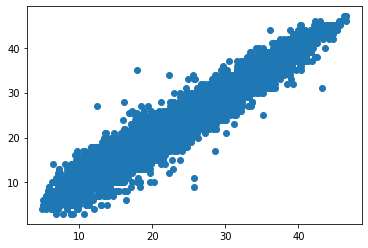

In [30]:
plt.scatter(prediction4,test_y)

In [12]:
from datetime import datetime
datetime.today()
date=datetime.now()


In [13]:
D=date.day
H=date.hour
M=date.month
print(D,H,M)

23 11 1


In [14]:
#For hourly, daily, weekly and min max temp details
L=[]
import random
D=date.day
H=date.hour
M=date.month
tp=33
for d in range(1,15):
    for h in range(1,25):
        para=np.array([D,M,H,48,45,0,tp]).reshape(1,-1)
        p=tlrmodel.predict(para)
        print(p,H,D,M)
        tp=list(p)[0]
        H+=1
        if H==24:
            H=0
            h=24
            D+=1
        if D==31:
            M+=1
            D=1
        


[32.12542427] 11 23 1
[31.10504651] 12 23 1
[29.94286489] 13 23 1
[28.64276795] 14 23 1
[27.20853762] 15 23 1
[25.64385209] 16 23 1
[23.95228872] 17 23 1
[22.13732673] 18 23 1
[20.20234997] 19 23 1
[18.15064948] 20 23 1
[15.98542606] 21 23 1
[13.70979274] 22 23 1
[11.32677717] 23 23 1
[12.91336929] 0 24 1
[14.28666923] 1 24 1
[15.4525259] 2 24 1
[16.41662781] 3 24 1
[17.18450746] 4 24 1
[17.76154568] 5 24 1
[18.1529757] 6 24 1
[18.36388728] 7 24 1
[18.3992306] 8 24 1
[18.26382008] 9 24 1
[17.96233813] 10 24 1
[17.49933878] 11 24 1
[16.87925113] 12 24 1
[16.10638288] 13 24 1
[15.18492357] 14 24 1
[14.11894785] 15 24 1
[12.91241867] 16 24 1
[11.56919028] 17 24 1
[10.09301123] 18 24 1
[8.48752731] 19 24 1
[6.75628431] 20 24 1
[4.9027308] 21 24 1
[2.93022077] 22 24 1
[0.84201625] 23 24 1
[2.71533511] 0 25 1
[4.36749917] 1 25 1
[5.80457296] 2 25 1
[7.03245466] 3 25 1
[8.05688074] 4 25 1
[8.88343037] 5 25 1
[9.51752971] 6 25 1
[9.96445613] 7 25 1
[10.22934228] 8 25 1
[10.31718008] 9 25 1
[10

In [50]:
weather_df["temp"].value_count()

AttributeError: 'Series' object has no attribute 'value_count'